## LEVEL 3

## Task 1 : Restaurant Reviews

## Analyze the text reviews to identify the most common positive and negative keywords.

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Load the dataset (replace 'dataset.csv' with your actual dataset)
df = pd.read_csv('restaurants.csv')

# Verify DataFrame contents
print(df.head())  # Ensure columns like 'Rating text', 'Aggregate rating' exist

# Clean and preprocess text data
reviews = df['Rating text'].dropna().astype(str)

# Tokenize and preprocess text
tokens = [word_tokenize(review.lower()) for review in reviews]

# Remove stopwords and single character tokens
stop_words = set(stopwords.words('english'))
filtered_tokens = []
for token_list in tokens:
    filtered_tokens.append([word for word in token_list if word.isalnum() and word not in stop_words and len(word) > 1])

# Lemmatize tokens
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = []
for token_list in filtered_tokens:
    lemmatized_tokens.append([lemmatizer.lemmatize(word) for word in token_list])

# Classify sentiment (assuming simple based on 'Aggregate rating')
positive_keywords = []
negative_keywords = []

for tokens, rating in zip(lemmatized_tokens, df['Aggregate rating']):
    if rating >= 4.0:  # Example threshold for positive reviews
        positive_keywords.extend(tokens)
    elif rating < 3.0:  # Example threshold for negative reviews
        negative_keywords.extend(tokens)

# Count and identify most common keywords
top_positive_keywords = Counter(positive_keywords).most_common(10)
top_negative_keywords = Counter(negative_keywords).most_common(10)

# Display results
print("Top 10 Positive Keywords:")
print(top_positive_keywords)
print("\nTop 10 Negative Keywords:")
print(top_negative_keywords)


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

## Calculate the average length of reviews and explore if there is a relationship between review length and rating.

Average Review Length: 1.00 words


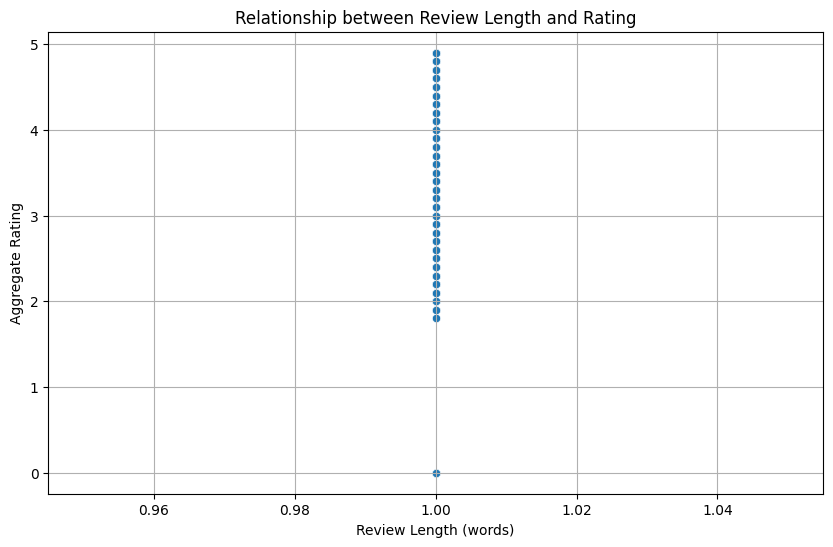

In [12]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Load the dataset (replace 'dataset.csv' with your actual dataset)
df = pd.read_csv('restaurants.csv')

# Clean and preprocess text data
reviews = df['Rating text'].dropna().astype(str)

# Tokenize and preprocess text
tokens = [word_tokenize(review.lower()) for review in reviews]

# Remove stopwords and single character tokens
stop_words = set(stopwords.words('english'))
filtered_tokens = []
for token_list in tokens:
    filtered_tokens.append([word for word in token_list if word.isalnum() and word not in stop_words])

# Calculate review lengths (number of tokens)
review_lengths = [len(tokens) for tokens in filtered_tokens]

# Add review lengths to DataFrame
df['Review Length'] = review_lengths

# Calculate average review length
average_review_length = sum(review_lengths) / len(review_lengths)
print(f"Average Review Length: {average_review_length:.2f} words")

# Explore relationship between review length and rating
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting review length vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Review Length', y='Aggregate rating', data=df)
plt.title('Relationship between Review Length and Rating')
plt.xlabel('Review Length (words)')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()


## Task 2 : Votes Analysis

## Identify the restaurants with the highest and lowest number of votes.

In [13]:
# Identify restaurant with the highest number of votes
highest_votes_restaurant = df.loc[df['Votes'].idxmax()]

# Identify restaurant with the lowest number of votes
lowest_votes_restaurant = df.loc[df['Votes'].idxmin()]

# Display results
print("Restaurant with the Highest Votes:")
print(f"Name: {highest_votes_restaurant['Restaurant Name']}")
print(f"City: {highest_votes_restaurant['City']}")
print(f"Votes: {highest_votes_restaurant['Votes']}\n")

print("Restaurant with the Lowest Votes:")
print(f"Name: {lowest_votes_restaurant['Restaurant Name']}")
print(f"City: {lowest_votes_restaurant['City']}")
print(f"Votes: {lowest_votes_restaurant['Votes']}")


Restaurant with the Highest Votes:
Name: Toit
City: Bangalore
Votes: 10934

Restaurant with the Lowest Votes:
Name: Cantinho da Gula
City: S��o Paulo
Votes: 0


## Analyze if there is a correlation between the number of votes and the rating of a restaurant

Correlation between Votes and Aggregate Rating: 0.31


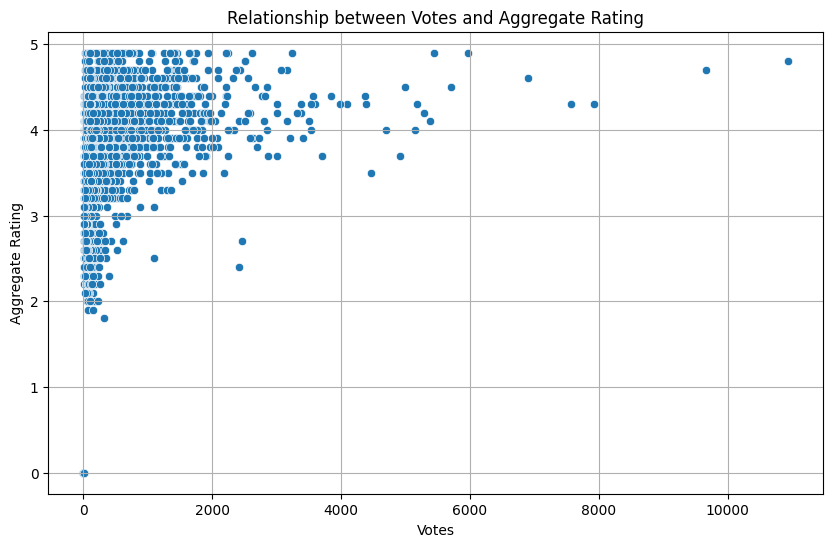

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Votes' and 'Aggregate rating' are numeric
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Drop rows with NaN values in either 'Votes' or 'Aggregate rating'
df = df.dropna(subset=['Votes', 'Aggregate rating'])

# Compute correlation between 'Votes' and 'Aggregate rating'
correlation = df['Votes'].corr(df['Aggregate rating'])

print(f"Correlation between Votes and Aggregate Rating: {correlation:.2f}")

# Plotting relationship between 'Votes' and 'Aggregate rating'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Relationship between Votes and Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()


## Task 3 : Price Range vs. Online Delivery and Table Booking

## Analyze if there is a relationship between the price range and the availability of online delivery and table booking

In [26]:
online_delivery_by_price = df.groupby('Price range')['Has Online delivery'].mean().reset_index()
table_booking_by_price = df.groupby('Price range')['Has Table booking'].mean().reset_index()

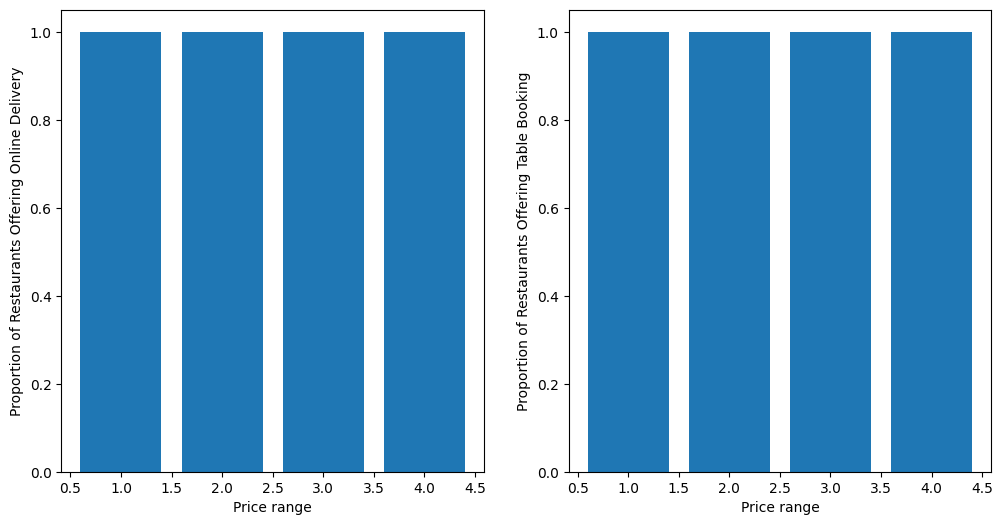

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(online_delivery_by_price['Price range'], online_delivery_by_price['Has Online delivery'])
ax[0].set_xlabel('Price range')
ax[0].set_ylabel('Proportion of Restaurants Offering Online Delivery')

ax[1].bar(table_booking_by_price['Price range'], table_booking_by_price['Has Table booking'])
ax[1].set_xlabel('Price range')
ax[1].set_ylabel('Proportion of Restaurants Offering Table Booking')

plt.show()

## Determine if higher-priced restaurants are more likely to offer these services.

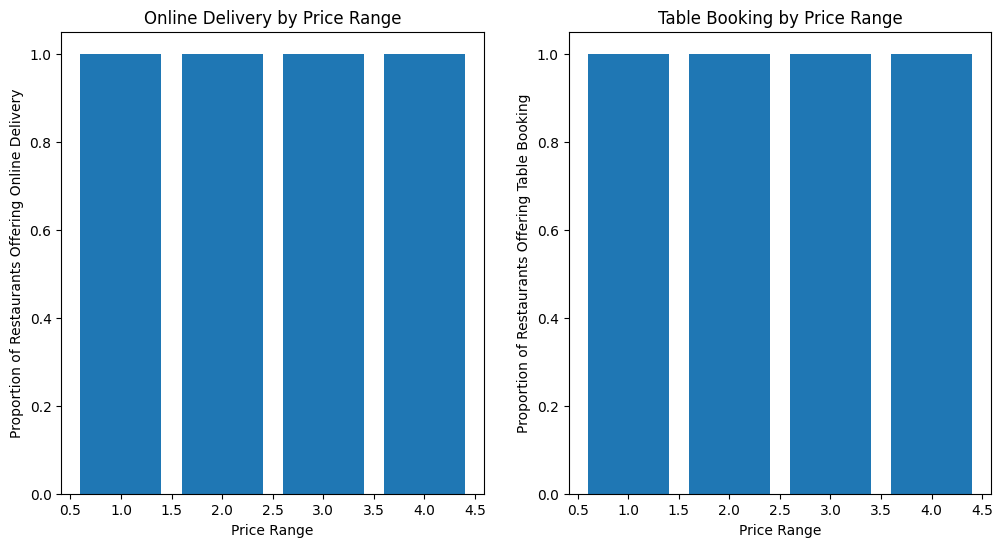

In [39]:
import matplotlib.pyplot as plt

# Online Delivery
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(online_delivery_by_price['Price range'], online_delivery_by_price['Has Online delivery'])
ax[0].set_xlabel('Price Range')
ax[0].set_ylabel('Proportion of Restaurants Offering Online Delivery')
ax[0].set_title('Online Delivery by Price Range')

# Table Booking
ax[1].bar(table_booking_by_price['Price range'], table_booking_by_price['Has Table booking'])
ax[1].set_xlabel('Price Range')
ax[1].set_ylabel('Proportion of Restaurants Offering Table Booking')
ax[1].set_title('Table Booking by Price Range')

plt.show()

In [40]:
import pandas as pd

# Online Delivery
online_delivery_corr = online_delivery_by_price['Price range'].corr(online_delivery_by_price['Has Online delivery'])
print(f'Correlation between Price Range and Online Delivery: {online_delivery_corr:.2f}')

# Table Booking
table_booking_corr = table_booking_by_price['Price range'].corr(table_booking_by_price['Has Table booking'])
print(f'Correlation between Price Range and Table Booking: {table_booking_corr:.2f}')

Correlation between Price Range and Online Delivery: nan
Correlation between Price Range and Table Booking: nan


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [41]:
import statsmodels.api as sm

# Online Delivery
X = online_delivery_by_price['Price range']
y = online_delivery_by_price['Has Online delivery']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Table Booking
X = table_booking_by_price['Price range']
y = table_booking_by_price['Has Table booking']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Has Online delivery   R-squared:                         nan
Model:                             OLS   Adj. R-squared:                    nan
Method:                  Least Squares   F-statistic:                       nan
Date:                 Thu, 27 Jun 2024   Prob (F-statistic):                nan
Time:                         23:21:05   Log-Likelihood:                    inf
No. Observations:                    4   AIC:                              -inf
Df Residuals:                        2   BIC:                              -inf
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0000          0       

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1871: RuntimeWarning: invalid value encountered in scalar divide
  return self.mse_model/self.mse_resid
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\si